# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [5]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [6]:
customers = pd.read_csv("..\data\Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [7]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [12]:
customers.describe()
#Outliers in the max of all the different categories related to products bought.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


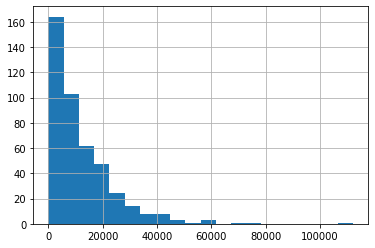

In [13]:
customers.Fresh.hist(bins=20)
#Distributions are left skewed.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [14]:
#There are outliers that should be checked whether they should be kept or not.
customers.Fresh.sort_values(ascending=False).head(10)

181    112151
125     76237
284     68951
39      56159
258     56083
103     56082
259     53205
282     49063
239     47493
176     45640
Name: Fresh, dtype: int64

In [15]:
customers.drop(customers.index[181],inplace=True)

In [16]:
customers.Milk.sort_values(ascending=False).head(10)

86     73498
47     54259
85     46197
183    43950
61     38369
23     36423
56     29892
211    28326
92     27472
171    25862
Name: Milk, dtype: int64

In [17]:
customers.drop(customers.index[86],inplace=True)

In [19]:
customers.Grocery.sort_values(ascending=False).head(10)

85     92780
333    67298
61     59598
47     55571
65     45828
211    39694
216    36486
145    34792
251    33586
92     32034
Name: Grocery, dtype: int64

In [20]:
customers.drop(customers.index[85],inplace=True)

In [23]:
customers.Frozen.sort_values(ascending=False).head(10)

325    60869
183    36534
93     35009
196    18711
103    18028
413    17866
277    16919
125    16538
338    15601
425    15348
Name: Frozen, dtype: int64

In [24]:
customers.drop(customers.index[325],inplace=True)

In [26]:
customers.Detergents_Paper.sort_values(ascending=False).head(10)

333    38102
61     26701
65     24231
47     24171
211    19410
92     18906
251    18594
56     17740
312    17120
343    15469
Name: Detergents_Paper, dtype: int64

In [27]:
customers.drop(customers.index[333],inplace=True)

In [32]:
customers.Delicassen.sort_values(ascending=False).head(10)

183    47943
23     16523
71     14472
87     14351
2       7844
202     6854
47      6465
218     6372
171     6250
40      5864
Name: Delicassen, dtype: int64

In [33]:
customers.drop(customers.index[183],inplace=True)

In [34]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,1.322581,2.541475,11750.334101,5522.944700,7715.820276,3026.274194,2765.923963,1510.177419
std,0.468003,0.777503,11763.100676,6272.442938,8548.009747,4829.883905,4356.340067,2817.977159
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3111.250000,1541.250000,2149.000000,724.250000,256.250000,405.250000
50%,1.000000,3.000000,8305.000000,3627.000000,4755.500000,1510.500000,812.000000,965.500000
75%,2.000000,3.000000,16800.000000,7141.000000,10510.250000,3519.750000,3888.500000,1811.250000
max,2.000000,3.000000,76237.000000,54259.000000,67298.000000,60869.000000,38102.000000,47943.000000


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [44]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = pd.DataFrame(scaler.fit_transform(customers))

In [46]:
customers_scale.head()

,0,1,2,3,4,5,6,7
0,1.449138,0.590421,0.078187,0.659683,-0.018133,-0.582937,-0.021126,-0.061170
1,1.449138,0.590421,-0.399448,0.684263,0.216930,-0.262063,0.121130,0.094440
2,1.449138,0.590421,-0.459366,0.524333,-0.003727,-0.128780,0.172379,2.250243
3,-0.690066,0.590421,0.128913,-0.690630,-0.409318,0.700146,-0.519136,0.098703
4,1.449138,0.590421,0.924689,-0.018027,-0.060648,0.184218,-0.227270,1.305569


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
customers_clusters = kmeans.fit(customers_scale)
customers_clusters.cluster_centers_
customers['labels'] = customers_clusters.fit_predict(customers_scale)
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


Count the values in `labels`.

In [49]:
customers.labels.value_counts()

0    230
1    113
3     69
4     21
2      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [93]:
# Your code here
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5,min_samples=5)
customers['labels_DBSCAN'] = db.fit_predict(customers_scale)

Count the values in `labels_DBSCAN`.

In [94]:
customers.labels_DBSCAN.value_counts()

-1    277
 1    119
 3     14
 2      7
 5      6
 4      6
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

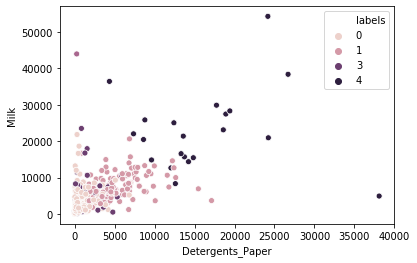

In [83]:
import seaborn as sns
sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels', data=customers)

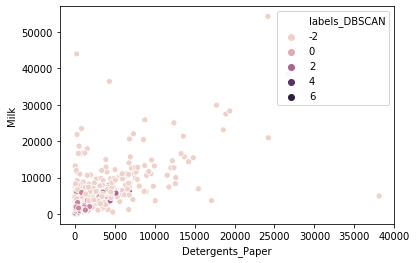

In [95]:
sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', data=customers)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

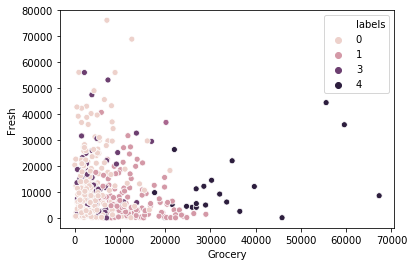

In [88]:
sns.scatterplot(x='Grocery', y='Fresh', hue='labels', data=customers)

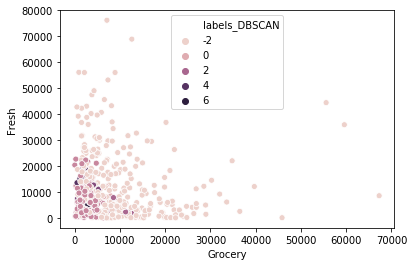

In [96]:
sns.scatterplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=customers)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

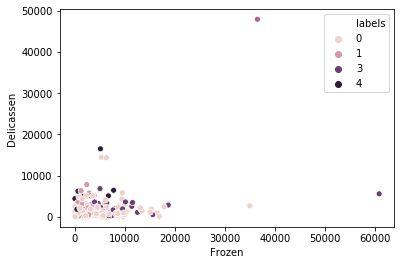

In [97]:
sns.scatterplot(x='Frozen', y='Delicassen', hue='labels', data=customers)

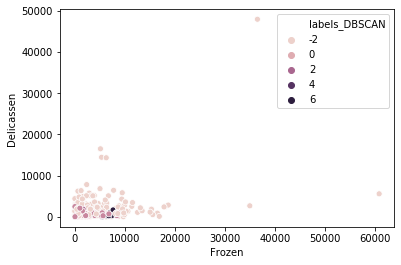

In [98]:
sns.scatterplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', data=customers)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [99]:
customers.groupby(by="labels").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.004348,2.908696,13340.817391,3066.430435,3782.569565,3292.665217,741.695652,1234.691304,0.034783
1,2.000000,2.690265,7857.876106,7974.707965,12869.292035,1347.415929,5554.309735,1431.044248,-0.769912
2,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
3,1.072464,1.086957,12503.260870,3909.086957,4339.608696,4615.347826,995.521739,1293.405797,0.768116
4,2.000000,2.476190,11606.904762,22707.619048,33563.904762,2325.666667,15869.238095,3454.380952,-1.000000


In [100]:
customers.groupby(by="labels_DBSCAN").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.462094,2.469314,13680.422383,7455.346570,10474.252708,3617.191336,3907.429603,1943.000000,1.140794
0,2.000000,3.000000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000
1,1.000000,3.000000,8208.857143,1872.705882,2410.226891,1922.369748,494.218487,723.319328,0.000000
2,2.000000,3.000000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000
3,1.000000,1.000000,8251.071429,2245.214286,2196.642857,1213.928571,356.785714,566.071429,3.000000
4,1.000000,1.000000,16396.500000,922.000000,1560.333333,2407.166667,232.166667,908.000000,3.000000
5,1.000000,1.000000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,3.000000


Which algorithm appears to perform better?

In [ ]:
#In my opinion, K-means seem to have more clear labels, their values differ more within each other, and the visualisations
#also show better defined patterns than the DBSCAN one

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here